In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [80]:
# x,y,class
data = [[1,1,0],[2,1,1],[1.5,1.5,2]]
nddata = np.asarray(data)
nddata[:,:2]

array([[1. , 1. ],
       [2. , 1. ],
       [1.5, 1.5]])

(0.5, 2)

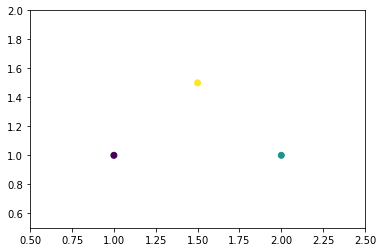

In [34]:
fig, ax = plt.subplots()
ax.scatter(nddata[:,0],nddata[:,1],c=nddata[:,2])
ax.set_xlim(0.5,2.5)
ax.set_ylim(0.5,2)

In [82]:
X = nddata[:,:2]
y = nddata[:,2]

In [88]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=10000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
layer_shape = [20,20]
clf = train_model(X,y,layer_shape,optimizer)
clf_list=[clf]

/home/dj/Desktop/ai/venv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [89]:
step = 0.05
x_min, x_max = nddata[:, 0].min() - .5, nddata[:, 0].max() + .5
y_min, y_max = nddata[:, 1].min() - .5, nddata[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

In [90]:
clf.predict_proba(np.c_[xx.ravel(), yy.ravel()]).shape

(1200, 3)

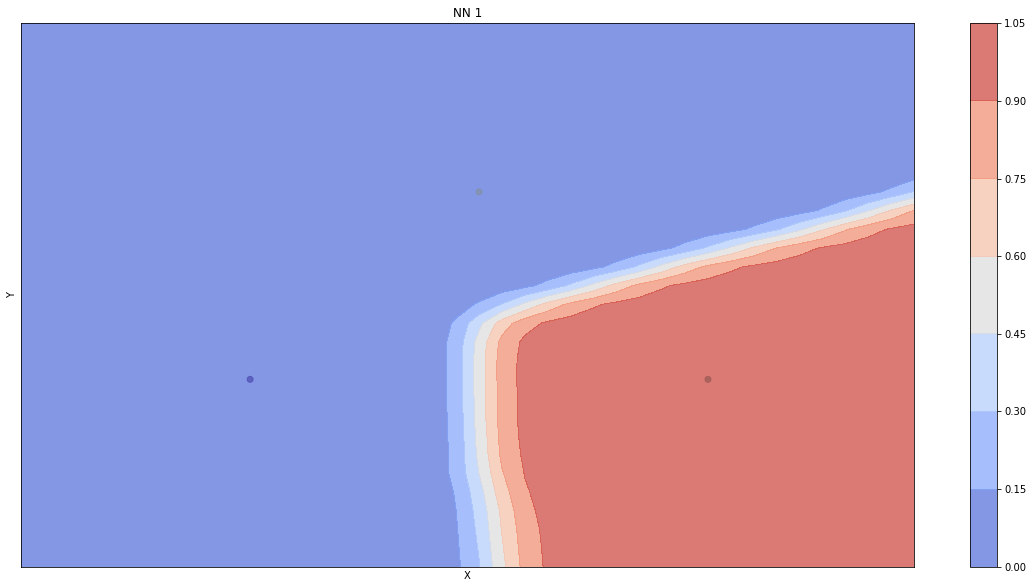

In [104]:

figure = plt.figure(figsize=(20, 10))
for i,clf in enumerate(clf_list):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    Z.shape
    # just plot the dataset first
    cm = plt.cm.RdBu
    #cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    cm_bright = ListedColormap(['white', '#0000FF'])
    ax = plt.subplot()
    ax.scatter(nddata[:, 0], nddata[:, 1], c=nddata[:,2], alpha=0.7)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.xlabel("X")
    plt.ylabel("Y")
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.colorbar(contour) 
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("NN "+str(i+1))
